# Informations

University of Zurich, <br>
Network Science, <br>
Assignment 4

Pietro Bonazzi, <br>
LEGI 17-200-635, <br>
pietro.bonazzi@uzh.ch

# Lib

In [1]:
%run functions.ipynb

# A04.1 Community detection

Task: For the given networks find the communities using
- the greedy modularity maximization by Clauset Newman and Moore and 
- the label propagation algorithm.
Assign to each community a color and draw the resulting graph.

Task: Randomise each network and compare the number
of communities obtained before and after randomisation.

In [5]:
folder="Data/4/Data/"
filenames=all_files(folder)
print(filenames)

['graph_AstroPh.gml', 'graph_jazz_collab.gml', 'graph_internet.gml', 'graph_game_thrones.gml', 'graph_dolphins.gml', 'graph_florentine_families.gml', 'graph_terrorists.gml', 'graph_eu_airlines.gml', 'graph_celegansInteractomes.gml', 'graph_facebook.gml', 'graph_CondMat.gml', 'graph_karate.gml', 'graph_chess.gml']


In [6]:
filenames=['graph_karate.gml', 'graph_dolphins.gml', 'graph_facebook.gml']

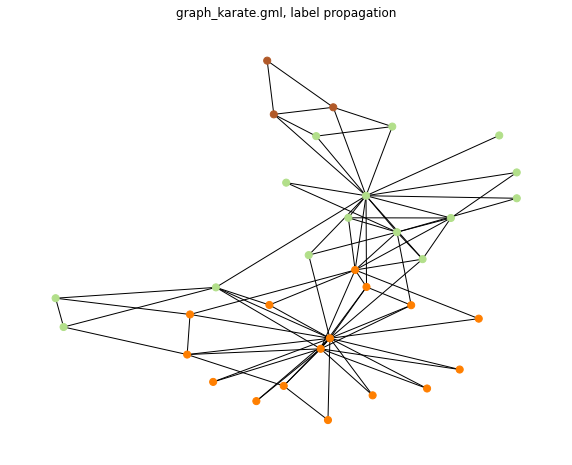

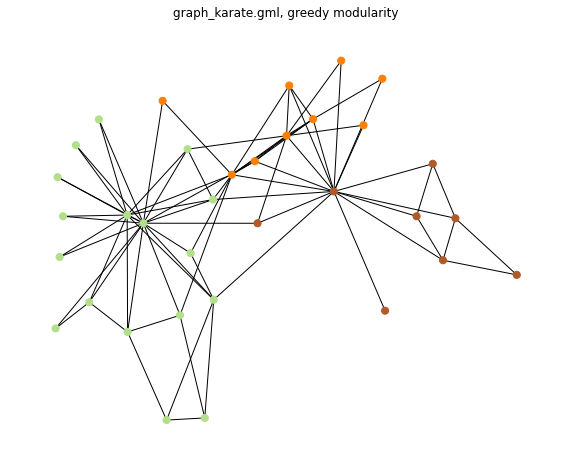

The number of communities found with label propagation was 3 , with randomised graph is 1
The number of communities found with greedy modularity was 3 , with randomised graph is 5


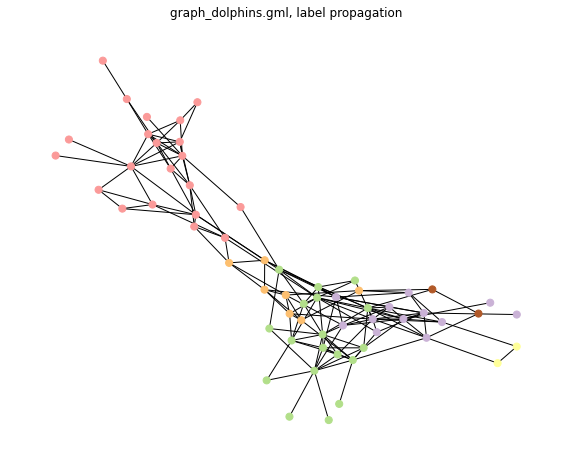

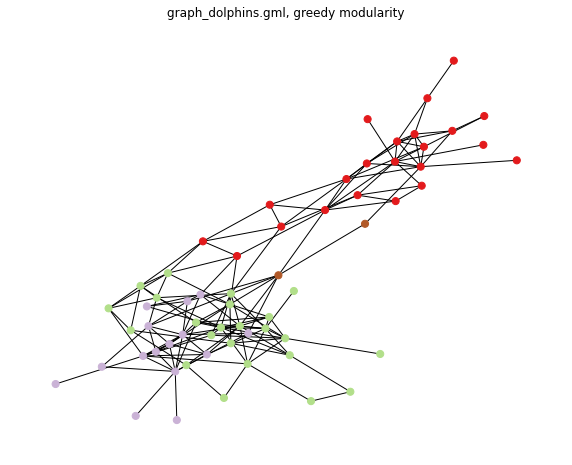

The number of communities found with label propagation was 6 , with randomised graph is 2
The number of communities found with greedy modularity was 4 , with randomised graph is 6


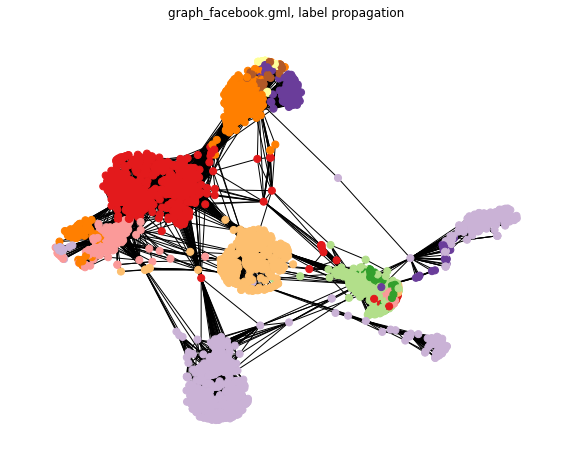

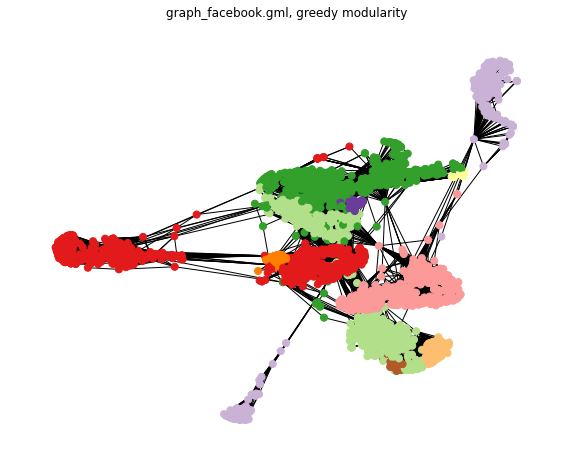

The number of communities found with label propagation was 44 , with randomised graph is 2
The number of communities found with greedy modularity was 13 , with randomised graph is 24


In [41]:
for i in range(len(filenames)) :     
    
    graph = nx.read_gml(folder+filenames[i])
    
    lp=find_community_label_propagation(graph)
    col_graph=create_community_colors(graph, lp)
    draw_graph_community_color(col_graph, filenames[i], "label propagation")
    
    gm=find_community_greedy_modularity(graph)
    col_graph=create_community_colors(graph, gm)
    draw_graph_community_color(col_graph, filenames[i], "greedy modularity")
    
    grn=randomise_graph(graph)
    lpr=find_community_label_propagation(grn)
    gmr=find_community_greedy_modularity(grn)
    print("The number of communities found with label propagation was", len(lp), ", with randomised graph is", len(lpr))
    print("The number of communities found with greedy modularity was", len(gm), ", with randomised graph is", len(gmr))

# A04.2 Erdos-Renyi random networks

Task: Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a)⟨𝑘⟩ = 0.2, (b)⟨𝑘⟩ = 1 and (c) ⟨𝑘⟩ = 2. 
1. Visualize these networks.

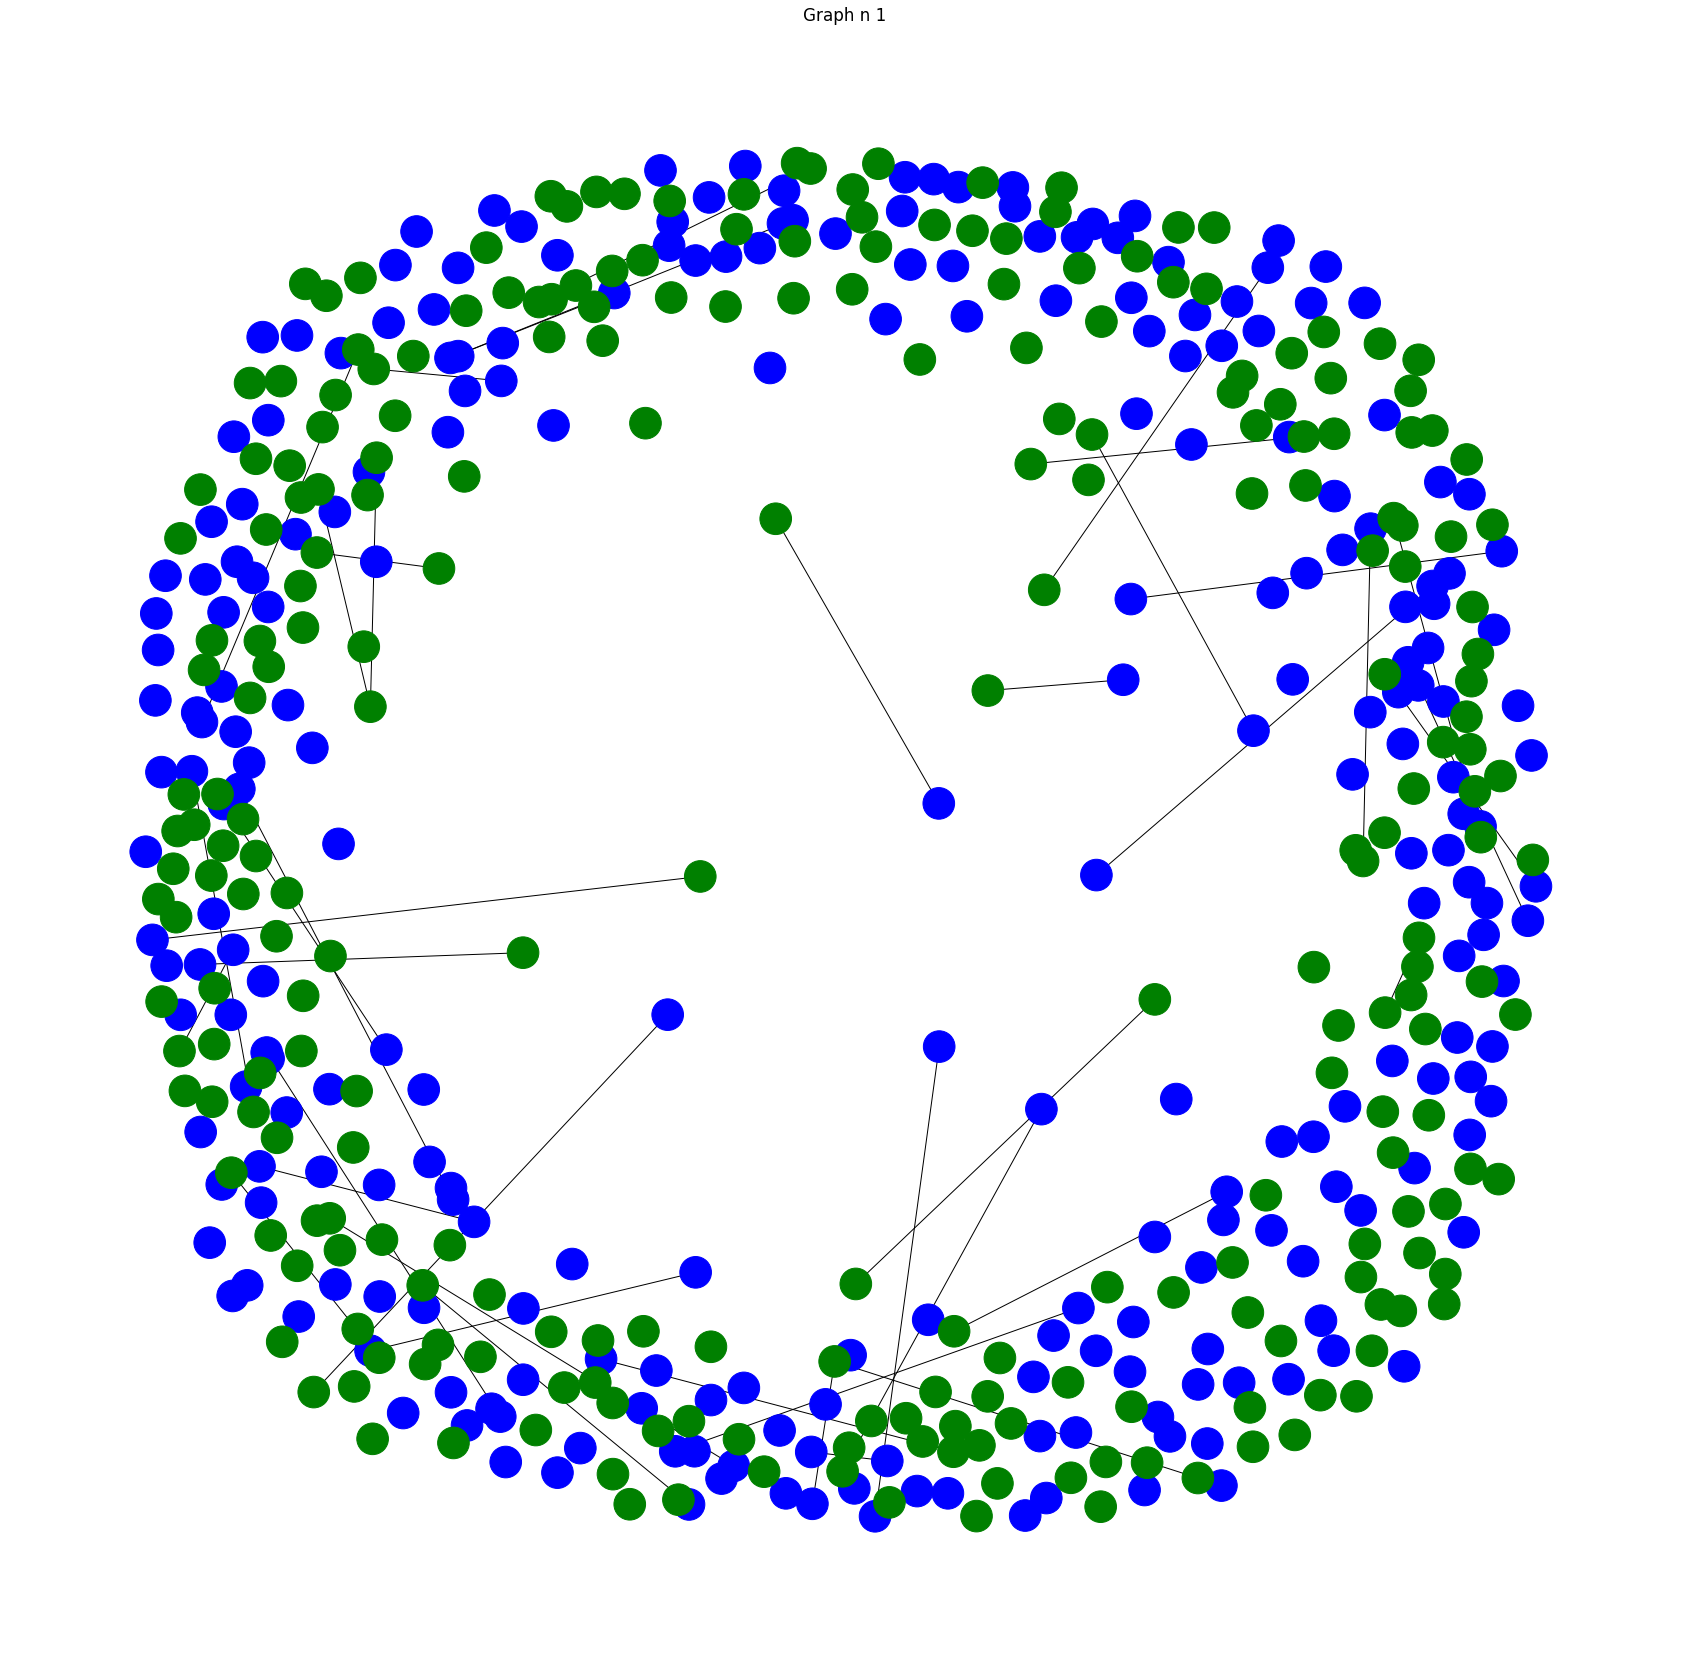

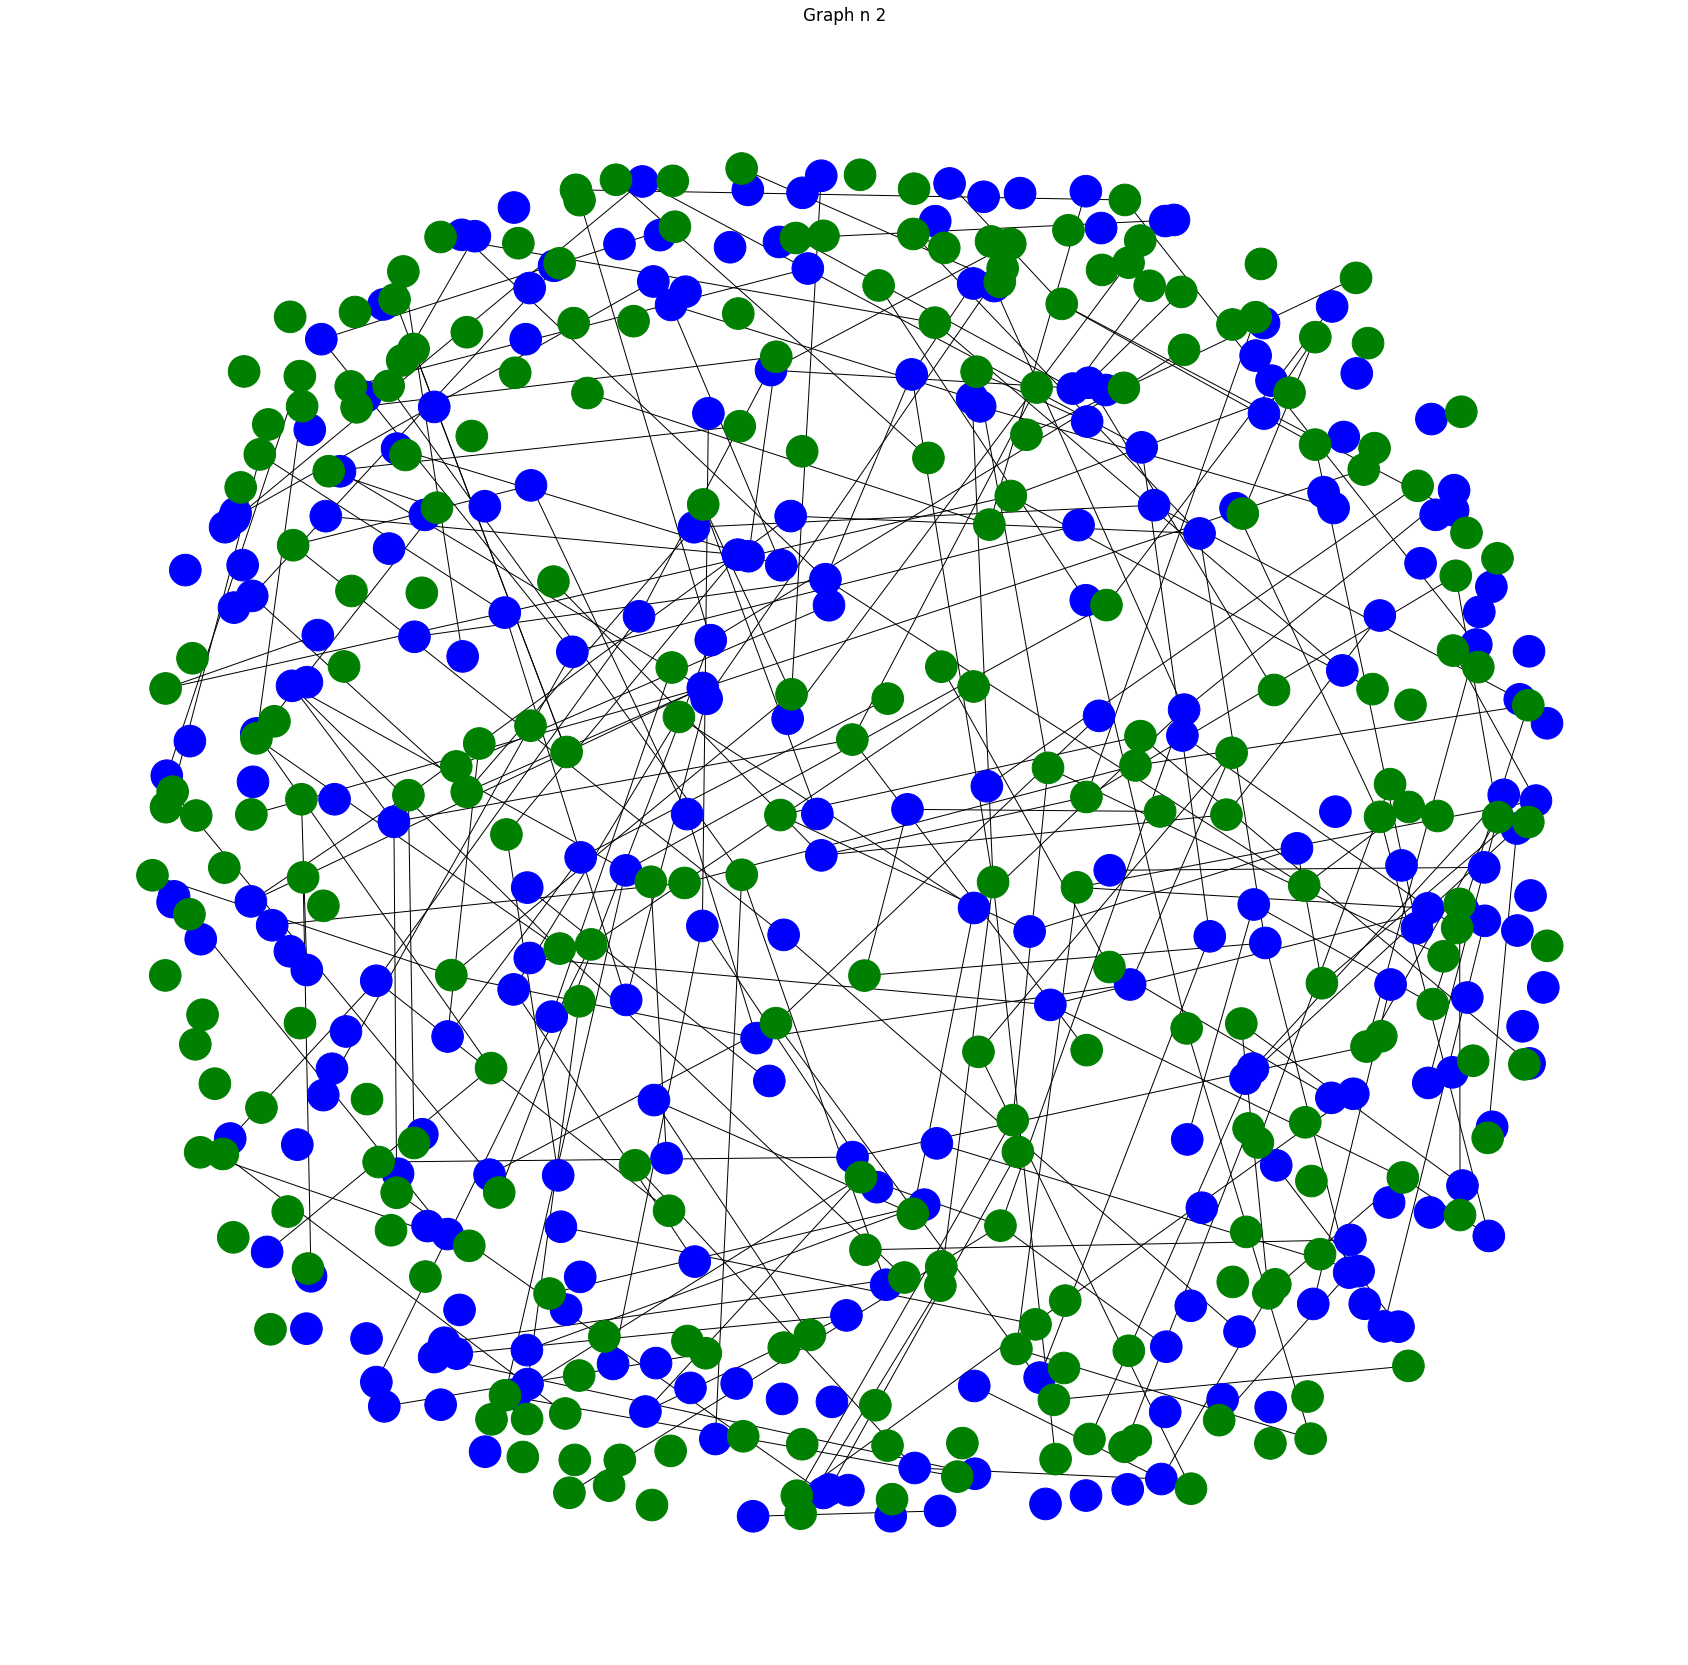

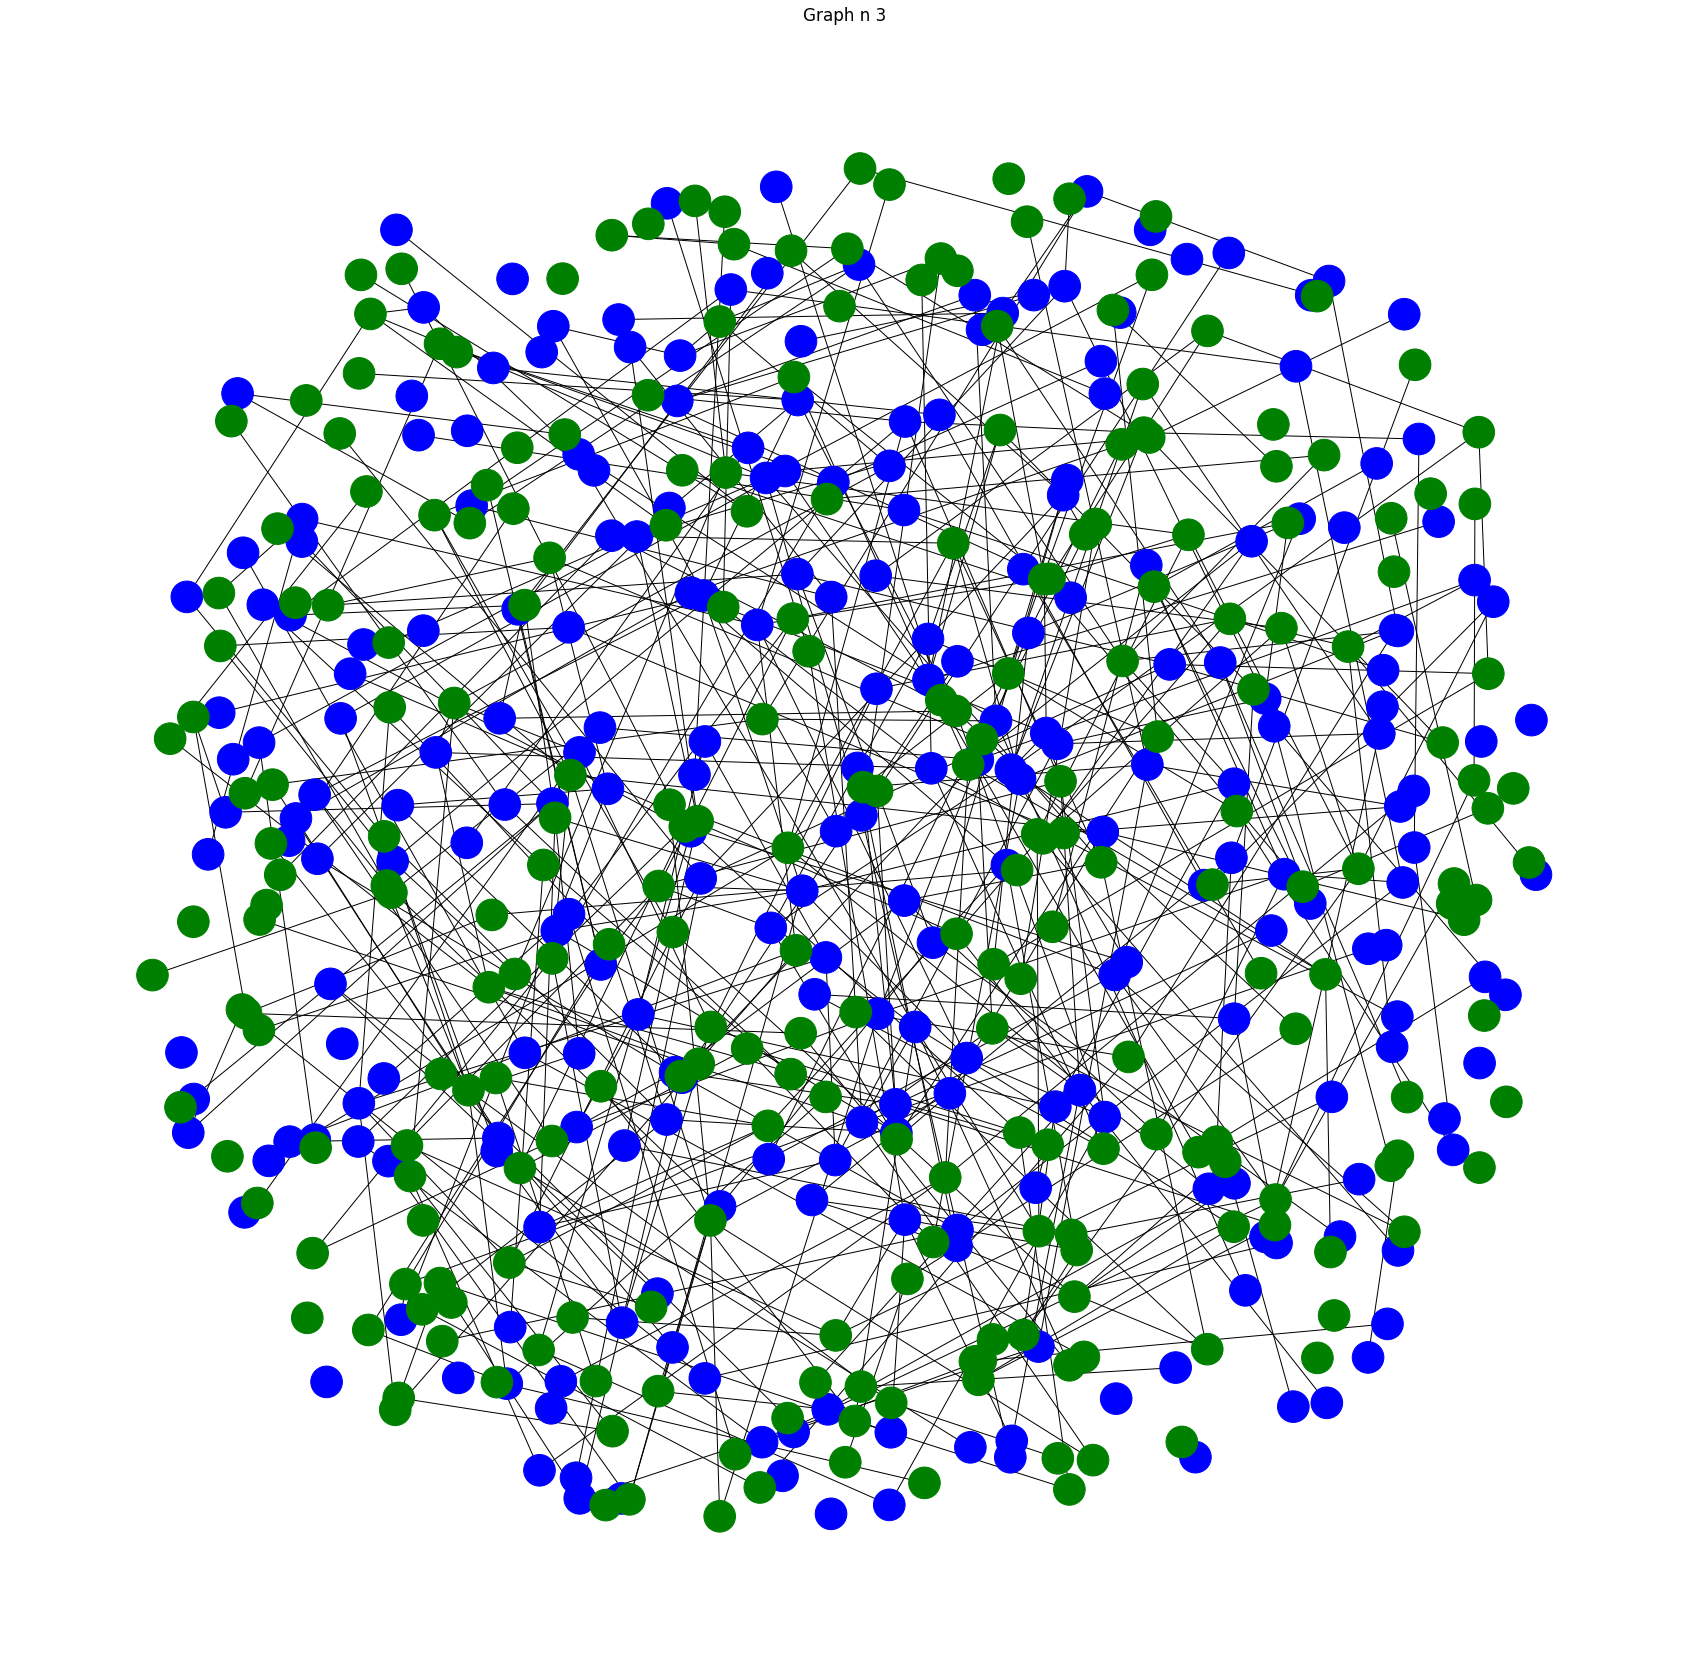

In [19]:
G1 = nx.erdos_renyi_graph(500, 0.2/(500-1))
G2 = nx.erdos_renyi_graph(500, 1/(500-1))
G3 = nx.erdos_renyi_graph(500, 2/(500-1))

graphs= [G1,G2,G3]

for g in range(1, len(graphs)+1) :
    num=len(graphs[g-1].nodes)
    G=graphs[g-1]
    color_map=[]
    for node in G:
        if node < num/2:
            color_map.append('blue')
        else: 
            color_map.append('green')      
    pos = nx.spring_layout(graphs[g-1], k=0.20, iterations=20)
    plt.figure(3, figsize=(30, 30))
    plt.rcParams.update({'font.size': 14})
    plt.title("Graph n "+str(g))
    nx.draw(graphs[g-1],node_color=color_map,with_labels=False, node_size=1000, pos=pos)
    plt.show()

Task: Generate ER graphs with 𝑁 = 100 nodes for different edge creation probabilities 𝑝 ∈ [0, 1] and:
1. Plot the probability that a node belongs to the largest connected component 𝑁𝐺/𝑁 as a function of 𝑝 and mark with a vertical line the critical probability 𝑝𝑐 = 1/𝑁
2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result

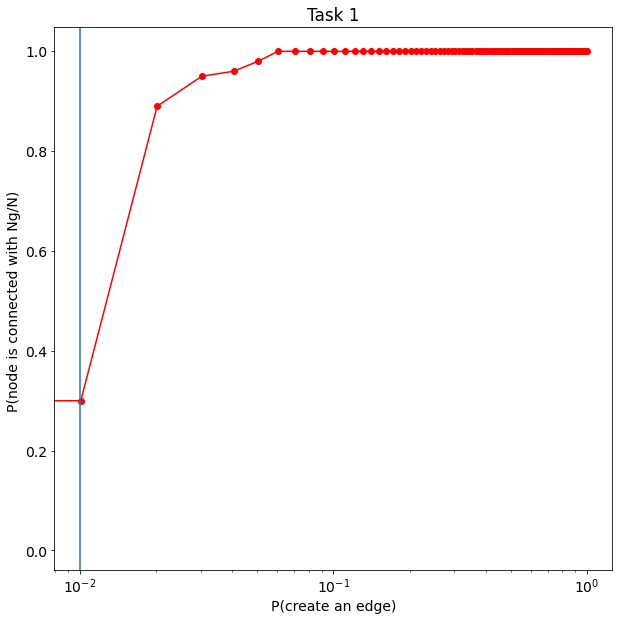

In [32]:
itert=100
nodes=100
prob = np.linspace(0,1,itert).reshape(-1,1)
conn=np.zeros(itert)

for i in range(itert) : 
    G = nx.erdos_renyi_graph(nodes, prob[i])
    components = [c for c in nx.connected_components(G)]
    nx.number_connected_components(G)
    maxcomp = max(components, key=len)
    conn[i]=len(maxcomp)/nodes

plot(prob, conn, "P(create an edge)","P(node is connected with Ng/N) ", "Task 1", x_scale="log", xline=1/nodes, size=[10,10])

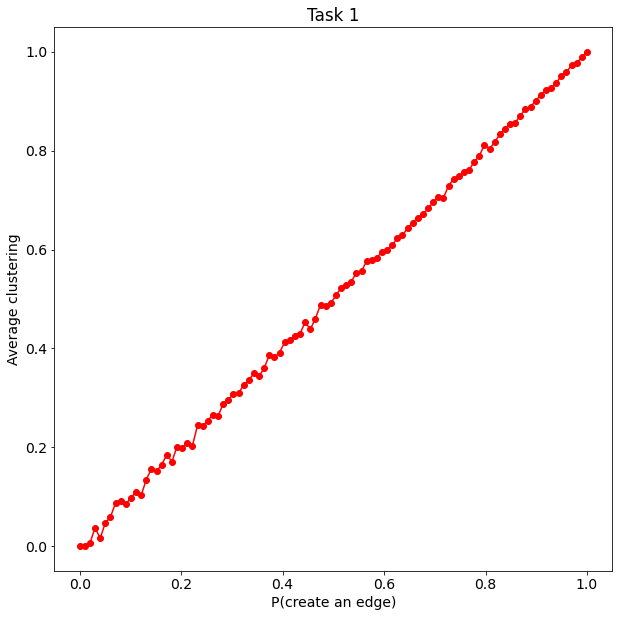

In [33]:
itert=100
nodes=100
prob = np.linspace(0.0,1.0,itert).reshape(-1,1)
avg=np.zeros(itert)

for i in range(itert) : 
    G = nx.erdos_renyi_graph(nodes, prob[i])
    avg[i]=mean_dictionary(compute_clustering_coeff(G))

plot(prob, avg, "P(create an edge)","Average clustering", "Task 1", size=[10,10])

In ER graphs for each node the probability that two of its neighbors are connected is the same probability that any other two nodes will be connected and it is equal to p. If one increases the probability of creating edges between nodes, it is also increasing the likelyhood that if two nodes are common neighbours of another node, they are also connected to each other.

# A04.3 Small-world with high clustering

Task: Generate many WS small-world networks with 𝑁 = 100 nodes and fixed number of neighbors for each node
2𝜅 = 10. As a function of the rewiring probability 𝑝, using
a logarithmic scale for the 𝑝-axis:
1. Plot the average clustering ⟨𝐶(𝑝)⟩/⟨𝐶(0)⟩ and check if it
correctly reproduces the analytical result
⟨𝐶(𝑝)⟩ ≈
3
2
(𝜅 − 1)
2𝜅 − 1 (1 − 𝑝)3
(1)
2. Plot the average shortest-path length 𝐷(𝑝)/𝐷(0)

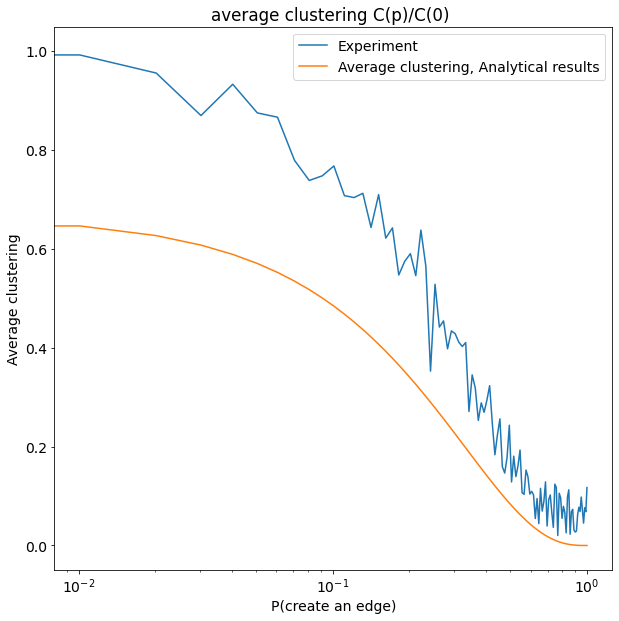

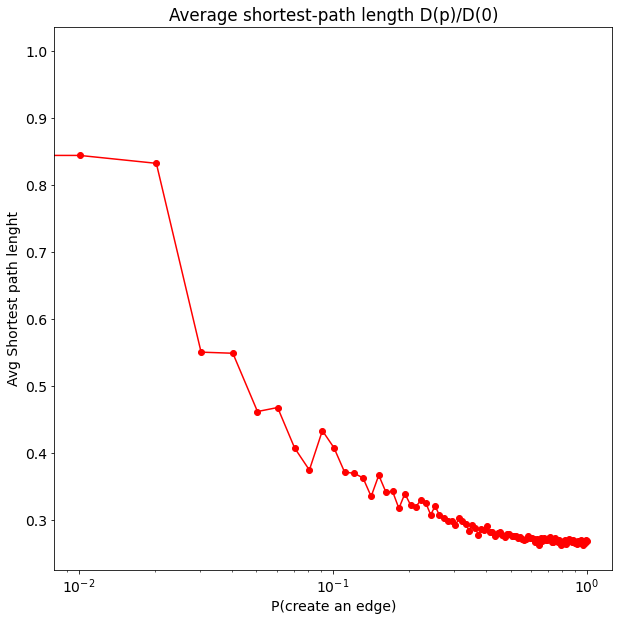

In [39]:
itert=100
nodes=100
k=5
prob = np.linspace(0.0,1.0,itert).reshape(-1,1)
avg=np.zeros(itert)
emp=np.zeros(itert)
spl=np.zeros(itert)

coeff=(3/2)*((k-1)/(2*k-1))

G0 = watts_strogatz_graph(nodes,k,0)
spl0 = average_shortest_path_length(G0)
avg0 = mean_dictionary(compute_clustering_coeff(G0))

for i in range(itert) : 
    G = watts_strogatz_graph(nodes, k, prob[i])
    avg[i]=mean_dictionary(compute_clustering_coeff(G))/avg0
    spl[i]=average_shortest_path_length(G)/spl0
    emp[i]=coeff*(1-prob[i])**3
    
plt.figure(3, figsize=(10,10))
plt.rcParams.update({'font.size': 14})
plt.plot(prob,avg, label="Experiment")
plt.plot(prob,emp, label="Average clustering, Analytical results")
plt.title("average clustering C(p)/C(0) ")
plt.xscale("log")
plt.xlabel("P(create an edge)")
plt.ylabel("Average clustering")
plt.legend()
plt.show()    
    
plot(prob, spl,"P(create an edge)", "Avg Shortest path lenght","Average shortest-path length D(p)/D(0)", size=[10,10], x_scale="log")